In [4]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow import data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
import os

In [5]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
import plotly.express as px
from scipy.signal import medfilt, butter, filtfilt
import pywt
from sklearn.model_selection import train_test_split
import scipy.signal
from keras.models import Sequential
from keras.layers import LSTM, Dense, Reshape
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# NB: in this work the appropriete metric is Recall : ensure that all anomalies are detected

In [9]:
normal_df = pd.read_csv("/content/ptbdb_normal.csv")
anomaly_df = pd.read_csv("/content/ptbdb_abnormal.csv")
normal_df.head()

1.000000000000000000e+00  9.003241658210754395e-01  \
0                  1.000000                  0.794681   
1                  0.909029                  0.791482   
2                  1.000000                  0.478893   
3                  1.000000                  0.867238   
4                  0.948983                  0.505265   

   3.585899472236633301e-01  5.145867168903350830e-02  \
0                  0.375387                  0.116883   
1                  0.423169                  0.186712   
2                  0.056760                  0.064176   
3                  0.201360                  0.099349   
4                  0.004176                  0.022513   

   4.659643396735191345e-02  1.268233358860015869e-01  \
0                  0.000000                  0.171923   
1                  0.000000                  0.007836   
2                  0.081289                  0.072732   
3                  0.141336                  0.120934   
4                  0.059550                  0.107298   

   1.333063244819641113e-01  1.191247999668121338e-01  \
0                  0.283859                  0.293754   
1                  0.063032                  0.077002   
2                  0.055619                  0.048774   
3                  0.108516                  0.096393   
4                  0.110385                  0.111293   

   1.106158867478370667e-01  1.130470037460327148e-01  ...  \
0                  0.325912                  0.345083  ...   
1                  0.074957                  0.077342  ...   
2                  0.054478                  0.041643  ...   
3                  0.093436                  0.100828  ...   
4                  0.116558                  0.118192  ...   

   0.000000000000000000e+00.56  0.000000000000000000e+00.57  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.58  0.000000000000000000e+00.59  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.60  0.000000000000000000e+00.61  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.62  0.000000000000000000e+00.63  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.64  0.000000000000000000e+00.65  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 188 columns]

In [10]:
print("Shape of Normal data", normal_df.shape)
print("Shape of Abnormal data", anomaly_df.shape)

Shape of Normal data (4045, 188)
Shape of Abnormal data (10505, 188)


In [11]:
CLASS_NAMES = ["Normal", "Anomaly"]

normal_df_copy = normal_df.copy()
anomaly_df_copy = anomaly_df.copy()
print(anomaly_df_copy.columns.equals(normal_df_copy.columns))

False


In [12]:
normal_df_copy = normal_df_copy.set_axis(range(1, 189), axis=1)
anomaly_df_copy = anomaly_df_copy.set_axis(range(1, 189), axis=1)
normal_df_copy = normal_df_copy.assign(target = CLASS_NAMES[0])
anomaly_df_copy = anomaly_df_copy.assign(target = CLASS_NAMES[1])


df = pd.concat((normal_df_copy, anomaly_df_copy))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14550 entries, 0 to 10504
Columns: 189 entries, 1 to target
dtypes: float64(188), object(1)
memory usage: 21.1+ MB


In [15]:
# Extract the first 5 lines from each dataset this is eserved for the inference
presentation_normal_data = normal_df.head(5)
presentation_anomaly_data = anomaly_df.head(5)

normal_df = normal_df.drop(normal_df.index[:5])
anomaly_df = anomaly_df.drop(anomaly_df.index[:5])

In [16]:
normal_df.drop("target", axis=1, errors="ignore", inplace=True)
normal = normal_df.to_numpy()
anomaly_df.drop("target", axis=1, errors="ignore", inplace=True)
anomaly = anomaly_df.to_numpy()

X_train, X_test = train_test_split(normal, test_size=0.15, random_state=45, shuffle=True)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, anomaly shape: {anomaly.shape}")

Train shape: (3434, 188), Test shape: (606, 188), anomaly shape: (10500, 188)


In [17]:
unique_values = df['target'].unique()
unique_values

array(['Normal', 'Anomaly'], dtype=object)

In [18]:
value_counts = df['target'].value_counts()
value_counts

target
Anomaly    10505
Normal      4045
Name: count, dtype: int64

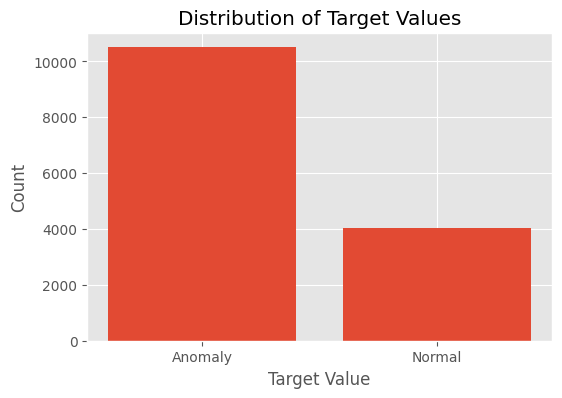

In [65]:
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target Values")
plt.show()

In [19]:
# Define a mapping dictionary
mapping = {'Normal': 1, 'Anomaly': 0}

# Apply the mapping to the 'target' column
df['target_numeric'] = df['target'].map(mapping)

In [20]:
df.head()

1         2         3         4         5         6         7  \
0  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
1  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
2  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
3  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
4  0.948983  0.505265  0.004176  0.022513  0.059550  0.107298  0.110385   

          8         9        10  ...  181  182  183  184  185  186  187  188  \
0  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.111293  0.116558  0.118192  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   target  target_numeric  
0  Normal               1  
1  Normal               1  
2  Normal               1  
3  Normal               1  
4  Normal               1  

[5 rows x 190 columns]

In [21]:
df.drop('target', axis=1, inplace=True)

In [22]:
df.head()

1         2         3         4         5         6         7  \
0  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
1  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
2  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
3  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
4  0.948983  0.505265  0.004176  0.022513  0.059550  0.107298  0.110385   

          8         9        10  ...  180  181  182  183  184  185  186  187  \
0  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.111293  0.116558  0.118192  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   188  target_numeric  
0  0.0               1  
1  0.0               1  
2  0.0               1  
3  0.0               1  
4  0.0               1  

[5 rows x 189 columns]

In [23]:
df.shape

(14550, 189)

In [24]:
df.isna().sum().sum()

0

In [72]:
abnormal = df[df['target_numeric'] ==0][:10]
normal = df[df['target_numeric'] ==1][:10]

fig = go.Figure()
leg  = [False] * abnormal.shape[0]
leg[0] = True

for i in range(abnormal.shape[0]):
    fig.add_trace(go.Scatter( x=np.arange(abnormal.shape[1]),y=abnormal.iloc[i,:],name='Abnormal ECG', mode='lines',  marker_color='rgba(255, 0, 0, 0.9)', showlegend= leg[i]))

for j in range(normal.shape[0]):
    fig.add_trace(go.Scatter( x=np.arange(normal.shape[1]),y=normal.iloc[j,:],name='Normal ECG',  mode='lines',  marker_color='rgba(0, 255, 0, 1)', showlegend= leg[j]))



fig.update_layout(xaxis_title="time", yaxis_title="Signal", title= {'text': 'Difference between different ECG', 'xanchor': 'center', 'yanchor': 'top', 'x':0.5} , bargap=0,)
fig.update_traces(opacity=0.5)
fig.show()

# Data preprocessing

# **Noise filtring**

In [73]:
ecg_data = df.iloc[:,:-1]
labels = df.iloc[:,-1]

In [74]:
scaler = MinMaxScaler(feature_range=(-1, 1))
ecg_data = scaler.fit_transform(ecg_data)

In [75]:
labels

0        1
1        1
2        1
3        1
4        1
        ..
10500    0
10501    0
10502    0
10503    0
10504    0
Name: target_numeric, Length: 14550, dtype: int64

# Plot the graphs of unfiltered and filtered signals

**Plot original ECG signal**

In [76]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(ecg_data.shape[0]), y=ecg_data[30], mode='lines', name='Original ECG signal'))

**Filtering techniques**

In [77]:
# Median filtering
ecg_medfilt = medfilt(ecg_data, kernel_size=3)

# Low-pass filtering
lowcut = 0.05
highcut = 20.0
nyquist = 0.5 * 360.0
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')
ecg_lowpass = filtfilt(b, a, ecg_data)

# Wavelet filtering
coeffs = pywt.wavedec(ecg_data, 'db4', level=1)
threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(ecg_data)))
coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
ecg_wavelet = pywt.waverec(coeffs, 'db4')

**Plot filtered ECG signals**

In [78]:
fig.add_trace(go.Scatter(x=np.arange(ecg_medfilt.shape[0]), y=ecg_medfilt[30], mode='lines', name='Median filtered ECG signal'))
fig.add_trace(go.Scatter(x=np.arange(ecg_lowpass.shape[0]), y=ecg_lowpass[30], mode='lines', name='Low-pass filtered ECG signal'))
fig.add_trace(go.Scatter(x=np.arange(ecg_wavelet.shape[0]), y=ecg_wavelet[30], mode='lines', name='Wavelet filtered ECG signal'))
fig.show()

# Choosing the best filtering technique

## Note :
#### We will evaluate the filtering methods by calculating each algorithm’s mean squared error (MSE). The algorithm with the lowest MSE will be selected. To calculate MSE, both signals’ dataframe must have an equal number of rows. If the dataset is reduced after filtering, this step involves padding the data with zeros.

In [79]:
def pad_data(original_data,filtered_data):
  diff = original_data.shape[1] - filtered_data.shape[1]

  if diff > 0:

      padding = np.zeros((filtered_data.shape[0], original_data.shape[1]))
      padded_data = np.concatenate((filtered_data, padding))

  elif diff < 0:
      padded_data = filtered_data[:,:-abs(diff)]

  elif diff == 0:
      padded_data = filtered_data

  return padded_data

def mse(original_data, filtered_data):
    filter_data = pad_data(original_data,filtered_data)
    return np.mean((original_data - filter_data) ** 2)

**Calculate the MSE**

In [80]:
mse_value_m = mse(ecg_data, ecg_medfilt)
mse_value_l = mse(ecg_data, ecg_lowpass)
mse_value_w = mse(ecg_data, ecg_wavelet)
print("MSE value of Median Filtering:", mse_value_m)
print("MSE value of Low-pass Filtering:", mse_value_l)
print("MSE value of Wavelet Filtering:", mse_value_w)

MSE value of Median Filtering: 0.09985034444831005
MSE value of Low-pass Filtering: 4.819134539659149
MSE value of Wavelet Filtering: 0.002469176425083116


# Splitting Data into Train & Test Set

In [81]:
X_train, X_test, y_train, y_test = train_test_split(ecg_wavelet, labels, test_size=0.2, random_state=42)

# Feature engineering: Choosing relevant features

In [82]:
features = []

for i in range(X_train.shape[0]):
    #Finding the R-peaks
    r_peaks = scipy.signal.find_peaks(X_train[i])[0]

    #Initialize lists to hold R-peak and T-peak amplitudes
    r_amplitudes = []
    t_amplitudes = []

    # Iterate through R-peak locations to find corresponding T-peak amplitudes
    for r_peak in r_peaks:
        # Find the index of the T-peak (minimum value) in the interval from R-peak to R-peak + 200 samples
        t_peak = np.argmin(X_train[i][r_peak:r_peak+200]) + r_peak
        #Append the R-peak amplitude and T-peak amplitude to the lists
        r_amplitudes.append(X_train[i][r_peak])
        t_amplitudes.append(X_train[i][t_peak])

    # extracting singular value metrics from the r_amplitudes
    std_r_amp = np.std(r_amplitudes)
    mean_r_amp = np.mean(r_amplitudes)
    median_r_amp = np.median(r_amplitudes)
    sum_r_amp = np.sum(r_amplitudes)
    # extracting singular value metrics from the t_amplitudes
    std_t_amp = np.std(t_amplitudes)
    mean_t_amp = np.mean(t_amplitudes)
    median_t_amp = np.median(t_amplitudes)
    sum_t_amp = np.sum(t_amplitudes)

    # Find the time between consecutive R-peaks
    rr_intervals = np.diff(r_peaks)

    # Calculate the time duration of the data collection
    time_duration = (len(X_train[i]) - 1) / 1000 # assuming data is in ms

    # Calculate the sampling rate
    sampling_rate = len(X_train[i]) / time_duration

    # Calculate heart rate
    duration = len(X_train[i]) / sampling_rate
    heart_rate = (len(r_peaks) / duration) * 60

    # QRS duration
    qrs_duration = []
    for j in range(len(r_peaks)):
        qrs_duration.append(r_peaks[j]-r_peaks[j-1])
    # extracting singular value metrics from the qrs_durations
    std_qrs = np.std(qrs_duration)
    mean_qrs = np.mean(qrs_duration)
    median_qrs = np.median(qrs_duration)
    sum_qrs = np.sum(qrs_duration)

    # Extracting the singular value metrics from the RR-interval
    std_rr = np.std(rr_intervals)
    mean_rr = np.mean(rr_intervals)
    median_rr = np.median(rr_intervals)
    sum_rr = np.sum(rr_intervals)

    # Extracting the overall standard deviation
    std = np.std(X_train[i])

    # Extracting the overall mean
    mean = np.mean(X_train[i])

    # Appending the features to the list
    features.append([mean, std, std_qrs, mean_qrs,median_qrs, sum_qrs, std_r_amp, mean_r_amp, median_r_amp, sum_r_amp, std_t_amp, mean_t_amp, median_t_amp, sum_t_amp, sum_rr, std_rr, mean_rr,median_rr, heart_rate])

# Converting the list to a numpy array
features = np.array(features)

In [83]:
pd.DataFrame(features)

0         1          2    3    4    5         6         7    8   \
0     -0.881374  0.326312  23.452767  0.0  2.0  0.0  0.256641 -0.942711 -1.0   
1     -0.800617  0.325770  31.885885  0.0  2.0  0.0  0.345919 -0.868335 -1.0   
2     -0.156456  0.733866  25.993720  0.0  2.0  0.0  0.732150 -0.491699 -1.0   
3     -0.488576  0.539798  25.199206  0.0  2.0  0.0  0.529275 -0.712563 -1.0   
4     -0.599650  0.535717  26.082178  0.0  2.0  0.0  0.436032 -0.816171 -1.0   
...         ...       ...        ...  ...  ...  ...       ...       ...  ...   
11635 -0.806094  0.340880  24.485934  0.0  2.0  0.0  0.298290 -0.886132 -1.0   
11636 -0.784974  0.352866  23.885529  0.0  2.0  0.0  0.280119 -0.897112 -1.0   
11637 -0.514381  0.466521  26.039250  0.0  2.0  0.0  0.431909 -0.734989 -1.0   
11638 -0.715893  0.318284  26.556243  0.0  2.0  0.0  0.305258 -0.815333 -1.0   
11639 -0.830754  0.274203  26.145427  0.0  2.0  0.0  0.130142 -0.924329 -1.0   

              9             10        11        12         13     14  \
0     -58.448112  2.220446e-16 -1.256448 -1.256448 -77.899794  182.0   
1     -26.918398  4.440892e-16 -1.256448 -1.256448 -38.949897  172.0   
2     -24.093262  0.000000e+00 -1.256448 -1.256448 -61.565966  179.0   
3     -38.478416  0.000000e+00 -1.256448 -1.256448 -67.848207  182.0   
4     -40.808572  0.000000e+00 -1.256448 -1.256448 -62.822414  180.0   
...          ...           ...       ...       ...        ...    ...   
11635 -36.331422  0.000000e+00 -1.256448 -1.256448 -51.514380  153.0   
11636 -48.444053  0.000000e+00 -1.256448 -1.256448 -67.848207  173.0   
11637 -34.544495  2.220446e-16 -1.256448 -1.256448 -59.053069  175.0   
11638 -38.320628  4.380533e-02 -1.036976 -1.000000 -48.737892  179.0   
11639 -44.367781  0.000000e+00 -1.256448 -1.256448 -60.309518  178.0   

             15        16   17            18  
0      2.670371  2.983607  2.0  19893.048128  
1      5.620992  5.733333  2.5   9946.524064  
2      2.884871  3.729167  2.0  15721.925134  
3      3.194981  3.433962  2.0  17326.203209  
4      4.409580  3.673469  2.0  16042.780749  
...         ...       ...  ...           ...  
11635  3.833324  3.825000  2.0  13155.080214  
11636  2.435205  3.264151  2.0  17326.203209  
11637  3.542411  3.804348  2.0  15080.213904  
11638  2.979847  3.891304  2.0  15080.213904  
11639  3.107549  3.787234  2.0  15401.069519  

[11640 rows x 19 columns]

In [84]:
X_train.shape

(11640, 188)

In [85]:
# Initializing an empty list to store the features
X_test_fe = []

# Extracting features for each sample
for i in range(X_test.shape[0]):
    # Finding the R-peaks
    r_peaks = scipy.signal.find_peaks(X_test[i])[0]

    # Initialize lists to hold R-peak and T-peak amplitudes
    r_amplitudes = []
    t_amplitudes = []

    # Iterate through R-peak locations to find corresponding T-peak amplitudes
    for r_peak in r_peaks:
        # Find the index of the T-peak (minimum value) in the interval from R-peak to R-peak + 200 samples
        t_peak = np.argmin(X_test[i][r_peak:r_peak+200]) + r_peak
        # Append the R-peak amplitude and T-peak amplitude to the lists
        r_amplitudes.append(X_test[i][r_peak])
        t_amplitudes.append(X_test[i][t_peak])
    #extracting singular value metrics from the r_amplitudes
    std_r_amp = np.std(r_amplitudes)
    mean_r_amp = np.mean(r_amplitudes)
    median_r_amp = np.median(r_amplitudes)
    sum_r_amp = np.sum(r_amplitudes)
    #extracting singular value metrics from the t_amplitudes
    std_t_amp = np.std(t_amplitudes)
    mean_t_amp = np.mean(t_amplitudes)
    median_t_amp = np.median(t_amplitudes)
    sum_t_amp = np.sum(t_amplitudes)

    # Find the time between consecutive R-peaks
    rr_intervals = np.diff(r_peaks)

    # Calculate the time duration of the data collection
    time_duration = (len(X_test[i]) - 1) / 1000 # assuming data is in ms

    # Calculate the sampling rate
    sampling_rate = len(X_test[i]) / time_duration

    # Calculate heart rate
    duration = len(X_test[i]) / sampling_rate
    heart_rate = (len(r_peaks) / duration) * 60

    # QRS duration
    qrs_duration = []
    for j in range(len(r_peaks)):
        qrs_duration.append(r_peaks[j]-r_peaks[j-1])
    #extracting singular value metrics from the qrs_duartions
    std_qrs = np.std(qrs_duration)
    mean_qrs = np.mean(qrs_duration)
    median_qrs = np.median(qrs_duration)
    sum_qrs = np.sum(qrs_duration)

    # Extracting the standard deviation of the RR-interval
    std_rr = np.std(rr_intervals)
    mean_rr = np.mean(rr_intervals)
    median_rr = np.median(rr_intervals)
    sum_rr = np.sum(rr_intervals)

      # Extracting the standard deviation of the RR-interval
    std = np.std(X_test[i])

    # Extracting the mean of the RR-interval
    mean = np.mean(X_test[i])

    # Appending the features to the list
    X_test_fe.append([mean, std,  std_qrs, mean_qrs,median_qrs, sum_qrs, std_r_amp, mean_r_amp, median_r_amp, sum_r_amp, std_t_amp, mean_t_amp, median_t_amp, sum_t_amp, sum_rr, std_rr, mean_rr,median_rr,heart_rate])

# Converting the list to a numpy array
X_test_fe = np.array(X_test_fe)

In [86]:
X_test_fe.shape

(2910, 19)

# Model Building and Training

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import time


In [ ]:
# Define the number of features in the train dataframe
num_features = features.shape[1]

# Reshape the features data to be in the right shape for LSTM input
features = np.asarray(features).astype('float32')
features = features.reshape(features.shape[0], features.shape[1], 1)

X_test_fe = np.asarray(X_test_fe).astype('float32')
X_test_fe = X_test_fe.reshape(X_test_fe.shape[0], X_test_fe.shape[1], 1)

# Define the model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(features.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Time the training process
start_time = time.time()

# Train the model
history = model.fit(features, y_train, validation_data=(X_test_fe, y_test), epochs=50, batch_size=32, verbose=1)

# Calculate the training time
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the validation set
y_pred = model.predict(X_test_fe)

# Convert the predicted values to binary labels
y_pred = [1 if p > 0.5 else 0 for p in y_pred]


In [88]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

# Evaluation of the Model

In [ ]:
# calculate the accuracy
acc = accuracy_score(y_test, y_pred)

#calculate the AUC score
auc = round(roc_auc_score(y_test, y_pred),2)

#classification report provides all metrics e.g. precision, recall, etc.
all_met = classification_report(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", acc*100, "%")
print(" \n")
print("AUC:", auc)
print(" \n")
print("Classification Report: \n", all_met)
print(" \n")


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

fig = px.imshow(conf_mat_df, text_auto= True, color_continuous_scale='Blues')
fig.update_xaxes(side='top', title_text='Predicted')
fig.update_yaxes(title_text='Actual')
fig.show()

In [ ]:
# Plot training and validation error
fig = go.Figure()
fig.add_trace(go.Scatter( y=history.history['loss'], mode='lines', name='Training'))
fig.add_trace(go.Scatter( y=history.history['val_loss'], mode='lines', name='Validation'))
fig.update_layout(xaxis_title="Epoch", yaxis_title="Error", title= {'text': 'Model Error', 'xanchor': 'center', 'yanchor': 'top', 'x':0.5} , bargap=0)
fig.show()

# using bilstm

In [ ]:
from keras.layers import LSTM, Dense, Bidirectional
from keras.models import Sequential

# Define the number of features in the train dataframe
num_features = features.shape[1]

# Reshape the features data to be in the right shape for LSTM input
features = np.asarray(features).astype('float32')
features = features.reshape(features.shape[0], features.shape[1], 1)

X_test_fe = np.asarray(X_test_fe).astype('float32')
X_test_fe = X_test_fe.reshape(X_test_fe.shape[0], X_test_fe.shape[1], 1)

# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(features.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(features, y_train, validation_data=(X_test_fe, y_test), epochs=50, batch_size=32)

# Calculate the training time
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the validation set
y_pred = model.predict(X_test_fe)

# Convert the predicted values to binary labels
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

In [93]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 128)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,765 (397.52 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,844 (265.02 KB)

# Model evaluation

In [ ]:
# calculate the accuracy
acc = accuracy_score(y_test, y_pred)

#calculate the AUC score
auc = round(roc_auc_score(y_test, y_pred),2)

#classification report provides all metrics e.g. precision, recall, etc.
all_met = classification_report(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", acc*100, "%")
print(" \n")
print("AUC:", auc)
print(" \n")
print("Classification Report: \n", all_met)
print(" \n")


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

fig = px.imshow(conf_mat_df, text_auto= True, color_continuous_scale='Blues')
fig.update_xaxes(side='top', title_text='Predicted')
fig.update_yaxes(title_text='Actual')
fig.show()

In [ ]:
# Plot training and validation error
fig = go.Figure()
fig.add_trace(go.Scatter( y=history.history['loss'], mode='lines', name='Training'))
fig.add_trace(go.Scatter( y=history.history['val_loss'], mode='lines', name='Validation'))
fig.update_layout(xaxis_title="Epoch", yaxis_title="Error", title= {'text': 'Model Error', 'xanchor': 'center', 'yanchor': 'top', 'x':0.5} , bargap=0)
fig.show()

# stack lstm , GRU, ConvLSTM

In [ ]:
from keras.layers import LSTM, Dense, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Dropout, ConvLSTM2D, GRU
from keras.models import Sequential

# Define the number of features in the train dataframe
num_features = features.shape[1]

# Reshape the features data to be in the right shape for LSTM input
features = np.asarray(features).astype('float32')
features = features.reshape(features.shape[0], features.shape[1], 1)

X_test_fe = np.asarray(X_test_fe).astype('float32')
X_test_fe = X_test_fe.reshape(X_test_fe.shape[0], X_test_fe.shape[1], 1)

# Stacked LSTM
stacked_lstm_model = Sequential()
stacked_lstm_model.add(LSTM(64, return_sequences=True, input_shape=(features.shape[1], 1)))
stacked_lstm_model.add(LSTM(64))
stacked_lstm_model.add(Dense(1, activation='sigmoid'))

# GRU
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(features.shape[1], 1)))
gru_model.add(Dense(1, activation='sigmoid'))

# CNN-LSTM
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(features.shape[1], 1)))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(1, activation='sigmoid'))



# Compile the models
stacked_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the models
print('stacked_lstm : ')
stacked_lstm_history = stacked_lstm_model.fit(features, y_train, validation_data=(X_test_fe, y_test), epochs=50, batch_size=32)
print('gru : ')
gru_history = gru_model.fit(features, y_train, validation_data=(X_test_fe, y_test), epochs=50, batch_size=32)
print('cnn_lstm : ')
cnn_lstm_history = cnn_lstm_model.fit(features, y_train, validation_data=(X_test_fe, y_test), epochs=50, batch_size=32)







# Plot Stacked LSTM accuracy
plt.plot(stacked_lstm_history.history['accuracy'], label='Stacked LSTM Training Accuracy', color='blue')
plt.plot(stacked_lstm_history.history['val_accuracy'], label='Stacked LSTM Validation Accuracy', color='skyblue')
plt.title('Stacked LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Stacked LSTM loss
plt.plot(stacked_lstm_history.history['loss'], label='Stacked LSTM Training Loss', color='red')
plt.plot(stacked_lstm_history.history['val_loss'], label='Stacked LSTM Validation Loss', color='orange')
plt.title('Stacked LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot GRU accuracy
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy', color='lightgreen')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot GRU loss
plt.plot(gru_history.history['loss'], label='GRU Training Loss', color='purple')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss', color='violet')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot CNN-LSTM accuracy
plt.plot(cnn_lstm_history.history['accuracy'], label='CNN-LSTM Training Accuracy', color='cyan')
plt.plot(cnn_lstm_history.history['val_accuracy'], label='CNN-LSTM Validation Accuracy', color='lightblue')
plt.title('CNN-LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot CNN-LSTM loss
plt.plot(cnn_lstm_history.history['loss'], label='CNN-LSTM Training Loss', color='magenta')
plt.plot(cnn_lstm_history.history['val_loss'], label='CNN-LSTM Validation Loss', color='pink')
plt.title('CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred =stacked_lstm_model.predict(X_test_fe)
y_pred_stack = [1 if p > 0.5 else 0 for p in y_pred_stack]

y_pred =gru_model.predict(X_test_fe)
y_pred_gru_model = [1 if p > 0.5 else 0 for p in y_pred_gru_model]

y_pred =cnn_lstm_model.predict(X_test_fe)
y_pred_cnn_lstm = [1 if p > 0.5 else 0 for p in y_pred_cnn_lstm]

In [98]:
stacked_lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 19, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

In [99]:
gru_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

In [100]:
cnn_lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 17, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,037 (390.77 KB)

 Trainable params: 33,345 (130.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,692 (260.52 KB)

# Models evaluation

# Stack Lstm

In [ ]:
# Make predictions on the validation set
y_pred_stakLstm = stacked_lstm_model.predict(X_test_fe)
# Convert the predicted values to binary labels
y_pred_stakLstm = [1 if p > 0.5 else 0 for p in y_pred_stakLstm]


# calculate the accuracy
acc = accuracy_score(y_test, y_pred_stakLstm)

#calculate the AUC score
auc = round(roc_auc_score(y_test, y_pred_stakLstm),2)

#classification report provides all metrics e.g. precision, recall, etc.
all_met = classification_report(y_test, y_pred_stakLstm)

# Print the accuracy
print("Accuracy: ", acc*100, "%")
print(" \n")
print("AUC:", auc)
print(" \n")
print("Classification Report: \n", all_met)
print(" \n")


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_stakLstm)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

fig = px.imshow(conf_mat_df, text_auto= True, color_continuous_scale='Blues')
fig.update_xaxes(side='top', title_text='Predicted')
fig.update_yaxes(title_text='Actual')
fig.show()

In [ ]:
# Plot training and validation error
fig = go.Figure()
fig.add_trace(go.Scatter( y=stacked_lstm_history.history['loss'], mode='lines', name='Training'))
fig.add_trace(go.Scatter( y=stacked_lstm_history.history['val_loss'], mode='lines', name='Validation'))
fig.update_layout(xaxis_title="Epoch", yaxis_title="Error", title= {'text': 'Model Error', 'xanchor': 'center', 'yanchor': 'top', 'x':0.5} , bargap=0)
fig.show()

# GRU

In [103]:
# Make predictions on the validation set
y_pred_gru_history = gru_model.predict(X_test_fe)
# Convert the predicted values to binary labels
y_pred_gru_history = [1 if p > 0.5 else 0 for p in y_pred_gru_history]


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
acc = accuracy_score(y_test, y_pred_gru_history)

#calculate the AUC score
auc = round(roc_auc_score(y_test, y_pred_gru_history),2)

#classification report provides all metrics e.g. precision, recall, etc.
all_met = classification_report(y_test, y_pred_gru_history)

# Print the accuracy
print("Accuracy: ", acc*100, "%")
print(" \n")
print("AUC:", auc)
print(" \n")
print("Classification Report: \n", all_met)
print(" \n")


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_gru_history)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

fig = px.imshow(conf_mat_df, text_auto= True, color_continuous_scale='Blues')
fig.update_xaxes(side='top', title_text='Predicted')
fig.update_yaxes(title_text='Actual')
fig.show()

In [ ]:
# Plot training and validation error
fig = go.Figure()
fig.add_trace(go.Scatter( y=gru_history.history['loss'], mode='lines', name='Training'))
fig.add_trace(go.Scatter( y=gru_history.history['val_loss'], mode='lines', name='Validation'))
fig.update_layout(xaxis_title="Epoch", yaxis_title="Error", title= {'text': 'Model Error', 'xanchor': 'center', 'yanchor': 'top', 'x':0.5} , bargap=0)
fig.show()

# ConvLSTM

In [106]:
# Make predictions on the validation set
y_pred_cnnlstm = cnn_lstm_model.predict(X_test_fe)
# Convert the predicted values to binary labels
y_pred_cnnlstm = [1 if p > 0.5 else 0 for p in y_pred_gru_history]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
acc = accuracy_score(y_test, y_pred_cnnlstm)

#calculate the AUC score
auc = round(roc_auc_score(y_test, y_pred_cnnlstm),2)

#classification report provides all metrics e.g. precision, recall, etc.
all_met = classification_report(y_test, y_pred_cnnlstm)

# Print the accuracy
print("Accuracy: ", acc*100, "%")
print(" \n")
print("AUC:", auc)
print(" \n")
print("Classification Report: \n", all_met)
print(" \n")


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_cnnlstm)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

fig = px.imshow(conf_mat_df, text_auto= True, color_continuous_scale='Blues')
fig.update_xaxes(side='top', title_text='Predicted')
fig.update_yaxes(title_text='Actual')
fig.show()

In [108]:
# Plot training and validation error
fig = go.Figure()
fig.add_trace(go.Scatter( y=cnn_lstm_history.history['loss'], mode='lines', name='Training'))
fig.add_trace(go.Scatter( y=cnn_lstm_history.history['val_loss'], mode='lines', name='Validation'))
fig.update_layout(xaxis_title="Epoch", yaxis_title="Error", title= {'text': 'Model Error', 'xanchor': 'center', 'yanchor': 'top', 'x':0.5} , bargap=0)
fig.show()

# ** *********** Autoencoders ******* **

In [49]:
raw_data = df.values

In [50]:
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]


In [51]:
# Wavelet filtering
coeffs = pywt.wavedec(data, 'db4', level=1)
threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(data)))
coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
data = pywt.waverec(coeffs, 'db4')


In [52]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [53]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [54]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [55]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

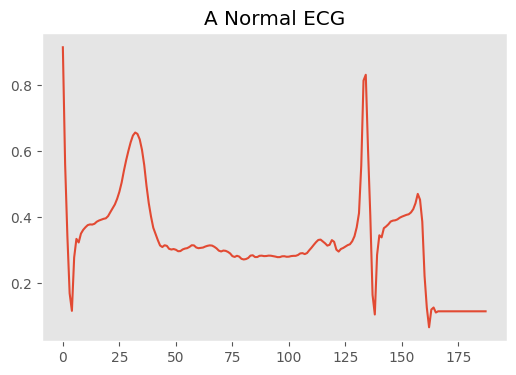

In [32]:
plt.grid()
plt.plot(np.arange(188), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

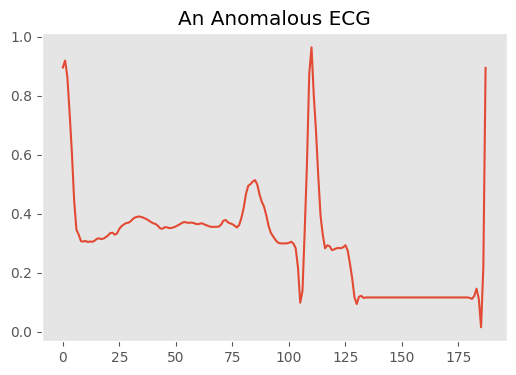

In [33]:
plt.grid()
plt.plot(np.arange(188), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [118]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(40, activation="relu"),
      layers.Dense(20, activation="relu"),
      layers.Dense(10, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(20, activation="relu"),
      layers.Dense(40, activation="relu"),
      layers.Dense(188, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [119]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [120]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=80,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - accuracy: 0.0000e+00 - loss: 0.6925 - val_accuracy: 0.0000e+00 - val_loss: 0.6878
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 7.7954e-05 - loss: 0.6850 - val_accuracy: 0.0014 - val_loss: 0.6727
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 8.4486e-04 - loss: 0.6653 - val_accuracy: 0.0014 - val_loss: 0.6449
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0016 - loss: 0.6304 - val_accuracy: 0.0399 - val_loss: 0.6204
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0092 - loss: 0.5971 - val_accuracy: 0.0402 - val_loss: 0.6098
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0189 - loss: 0.5757 - val_accuracy: 0.7254 - val_loss: 0.5848
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9308 - loss: 0.5582 - val_accuracy: 0.7254 - val_loss: 0.5740
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9308 - loss: 0.5491 - val_accuracy: 0.7254 - 

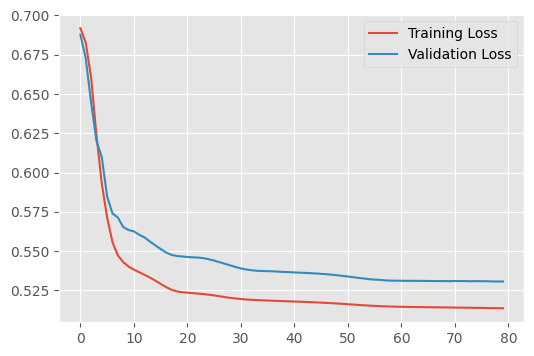

In [121]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

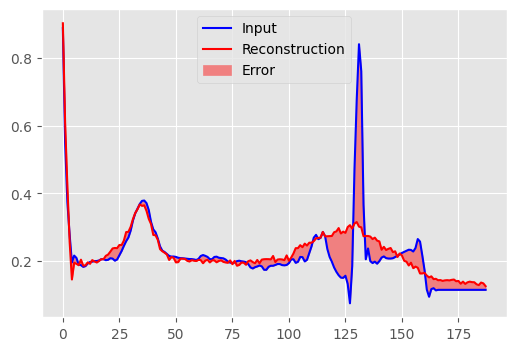

In [122]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(188), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

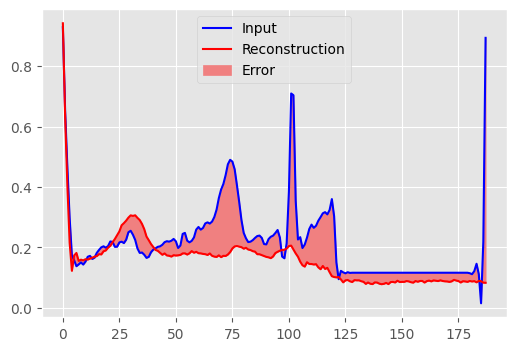

In [123]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(188), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


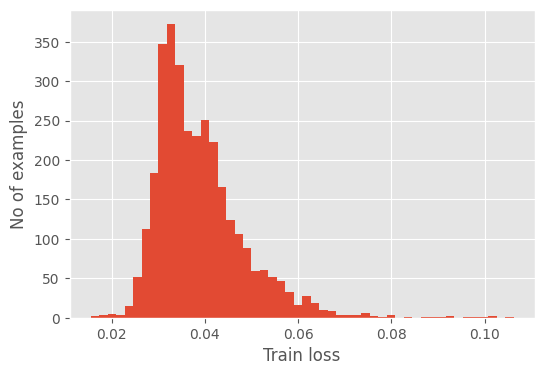

In [124]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [125]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.048476916


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


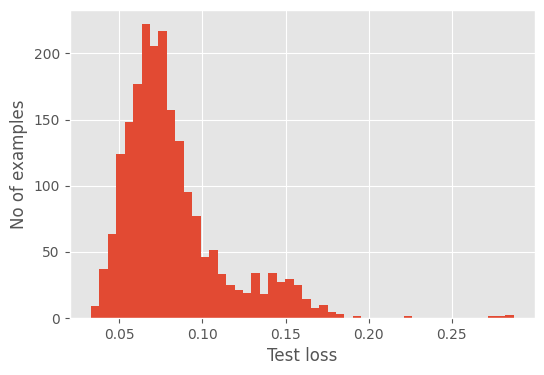

In [126]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [127]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [128]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.9137457044673539
Precision = 0.8610086100861009
Recall = 0.8353221957040573


In [129]:
def print_stats(predictions, labels):
    # Confusion Matrix
    conf_mat = confusion_matrix(labels, predictions)
    print("Confusion Matrix:")
    print(conf_mat)

    # AUC Calculation
    auc_score = roc_auc_score(labels, predictions)
    print("AUC Score:", auc_score)

    # Additional Metrics
    print("Accuracy:", accuracy_score(labels, predictions))
    print("Precision:", precision_score(labels, predictions))
    print("Recall:", recall_score(labels, predictions))
    print("F1 Score:", f1_score(labels, predictions))  # Calculate and print F1-score

# Generate predictions
preds = predict(autoencoder, test_data, threshold)

# Print statistics
print_stats(preds, test_labels)

Confusion Matrix:
[[1959  113]
 [ 138  700]]
AUC Score: 0.8903927580836889
Accuracy: 0.9137457044673539
Precision: 0.8610086100861009
Recall: 0.8353221957040573
F1 Score: 0.8479709267110842


** *****2eme architecture**

In [34]:
class AnomalyDetector2(tf.keras.Model):
    def __init__(self):
        super(AnomalyDetector2, self).__init__()

        self.encoder = tf.keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.2),  # Dropout with a rate of 20%
            layers.Dense(32, activation="relu"),
            layers.Dropout(0.2),  # Dropout with a rate of 20%
            layers.Dense(16, activation="relu")
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dropout(0.2),  # Dropout with a rate of 20%
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.2),  # Dropout with a rate of 20%
            layers.Dense(188, activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector2()

In [35]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=80,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 7.3842e-04 - loss: 0.6496 - val_accuracy: 0.0000e+00 - val_loss: 0.6278
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6052 - loss: 0.6034 - val_accuracy: 0.7254 - val_loss: 0.5972
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9372 - loss: 0.5689 - val_accuracy: 0.7254 - val_loss: 0.5746
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9359 - loss: 0.5497 - val_accuracy: 0.7254 - val_loss: 0.5697
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9310 - loss: 0.5427 - val_accuracy: 0.7254 - val_loss: 0.5631
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9356 - loss: 0.5382 - val_accuracy: 0.7254 - val_loss: 0.5618
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9347 - loss: 0.5351 - val_accuracy: 0.7254 - val_loss: 0.5576
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9367 - loss: 0.5327 - val_accuracy: 0.7254 - val_loss:

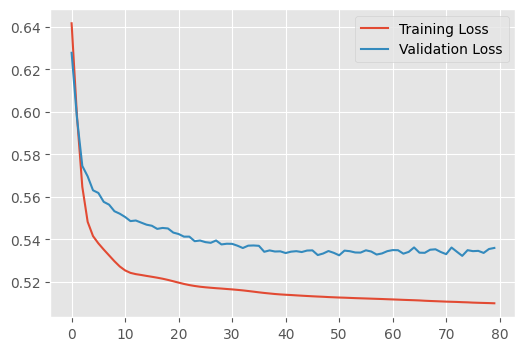

In [38]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

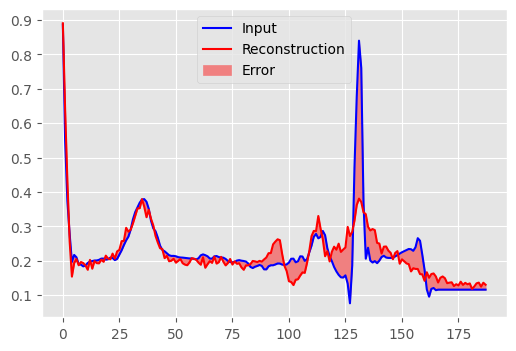

In [39]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(188), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

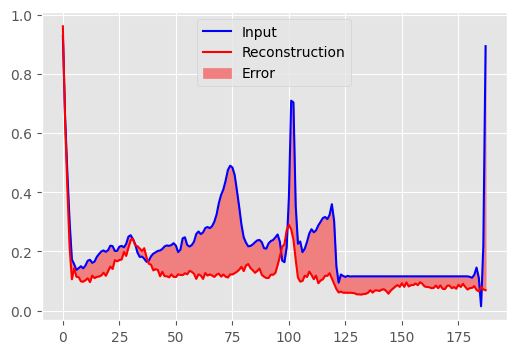

In [40]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(188), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


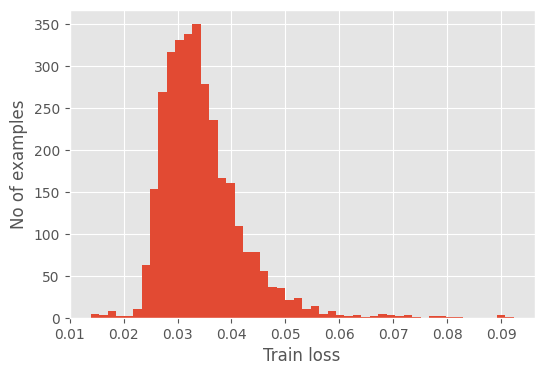

In [41]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [42]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.042146467


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


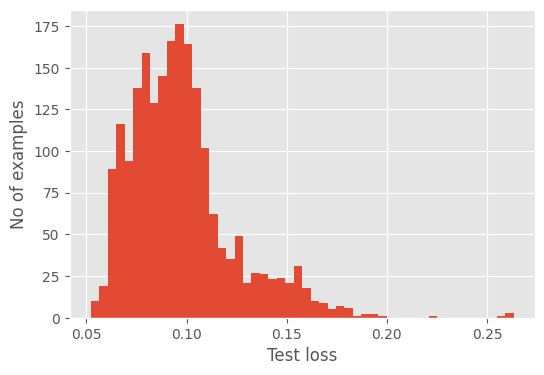

In [43]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [44]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [45]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.9580756013745705
Precision = 1.0
Recall = 0.8544152744630071


In [46]:
def print_stats(predictions, labels):
    # Confusion Matrix
    conf_mat = confusion_matrix(labels, predictions)
    print("Confusion Matrix:")
    print(conf_mat)

    # AUC Calculation
    auc_score = roc_auc_score(labels, predictions)
    print("AUC Score:", auc_score)

    # Additional Metrics
    print("Accuracy:", accuracy_score(labels, predictions))
    print("Precision:", precision_score(labels, predictions))
    print("Recall:", recall_score(labels, predictions))
    print("F1 Score:", f1_score(labels, predictions))  # Calculate and print F1-score

# Generate predictions
preds = predict(autoencoder, test_data, threshold)

# Print statistics
print_stats(preds, test_labels)

Confusion Matrix:
[[2072    0]
 [ 122  716]]
AUC Score: 0.9272076372315036
Accuracy: 0.9580756013745705
Precision: 1.0
Recall: 0.8544152744630071
F1 Score: 0.9214929214929215


**3éme Architecture**

In [48]:
class AnomalyDetector3(tf.keras.Model):
    def __init__(self):
        super(AnomalyDetector3, self).__init__()

        self.encoder = tf.keras.Sequential([
            layers.Dense(128, activation="relu"),  # First layer of the encoder
            layers.Dropout(0.3),                   # Dropout with a rate of 30%
            layers.Dense(64, activation="relu"),   # Second layer of the encoder
            layers.Dropout(0.3),                   # Dropout with a rate of 30%
            layers.Dense(32, activation="relu")    # Third layer of the encoder
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation="relu"),    # First layer of the decoder
            layers.Dropout(0.3),                   # Dropout with a rate of 30%
            layers.Dense(128, activation="relu"),   # Second layer of the decoder
            layers.Dropout(0.3),                   # Dropout with a rate of 30%
            layers.Dense(188, activation="sigmoid") # Output layer with sigmoid activation
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector3()


In [56]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=80,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.0000e+00 - loss: 0.6859 - val_accuracy: 0.0000e+00 - val_loss: 0.6510
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0395 - loss: 0.6295 - val_accuracy: 0.6395 - val_loss: 0.6194
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8676 - loss: 0.5745 - val_accuracy: 0.7254 - val_loss: 0.5755
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9330 - loss: 0.5468 - val_accuracy: 0.7254 - val_loss: 0.5707
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9352 - loss: 0.5417 - val_accuracy: 0.7254 - val_loss: 0.5661
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9380 - loss: 0.5387 - val_accuracy: 0.7254 - val_loss: 0.5641
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9347 - loss: 0.5353 - val_accuracy: 0.7254 - val_loss: 0.5591
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9329 - loss: 0.5329 - val_accuracy: 0.7254 - val_loss: 0.5

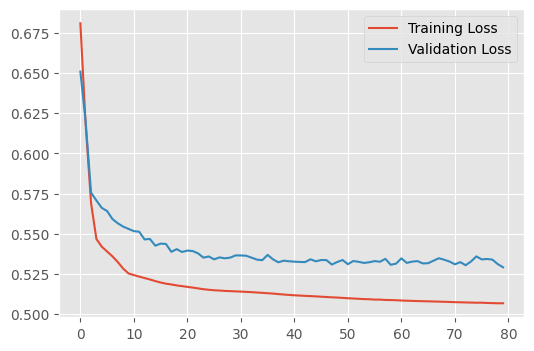

In [58]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

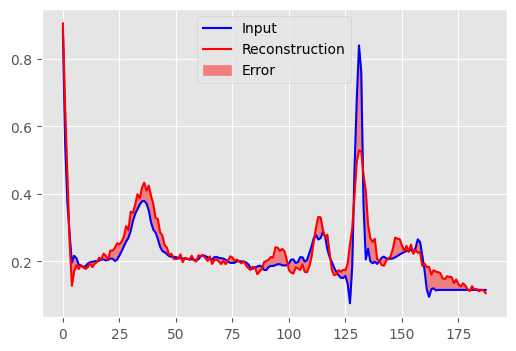

In [59]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(188), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

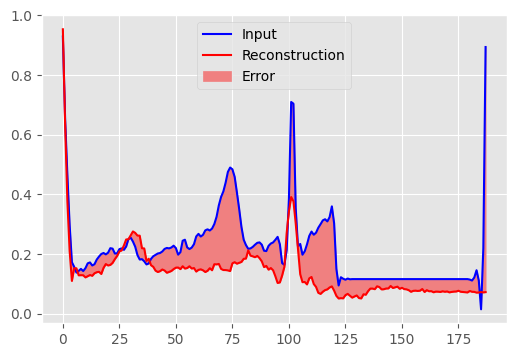

In [60]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(188), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


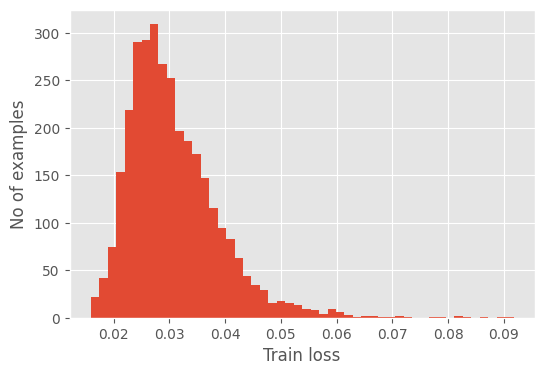

In [61]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [62]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.039160434


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


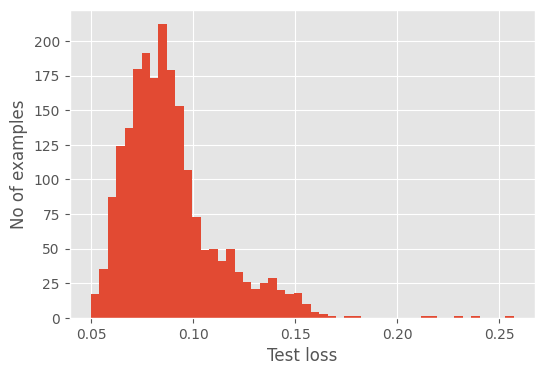

In [63]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [64]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [65]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.9532646048109966
Precision = 1.0
Recall = 0.837708830548926


In [66]:
def print_stats(predictions, labels):
    # Confusion Matrix
    conf_mat = confusion_matrix(labels, predictions)
    print("Confusion Matrix:")
    print(conf_mat)

    # AUC Calculation
    auc_score = roc_auc_score(labels, predictions)
    print("AUC Score:", auc_score)

    # Additional Metrics
    print("Accuracy:", accuracy_score(labels, predictions))
    print("Precision:", precision_score(labels, predictions))
    print("Recall:", recall_score(labels, predictions))
    print("F1 Score:", f1_score(labels, predictions))  # Calculate and print F1-score

# Generate predictions
preds = predict(autoencoder, test_data, threshold)

# Print statistics
print_stats(preds, test_labels)

Confusion Matrix:
[[2072    0]
 [ 136  702]]
AUC Score: 0.918854415274463
Accuracy: 0.9532646048109966
Precision: 1.0
Recall: 0.837708830548926
F1 Score: 0.9116883116883117
